In [1]:
from helpers import *
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# set globals for all simulations to keep them comparable
NUM_SIM = 50
NUM_CUST = 500
SERVICE_TIME = 2

p = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1])
intervalCustomers = SERVICE_TIME/p

In [3]:
#2.2
simulator1 = queuSim(capacity=1, numSim=5)
simulator2 = queuSim(capacity=2, numSim=5)
simulator4 = queuSim(capacity=4, numSim=5)

In [4]:
waitTimes1 = simulator1.runSim()
waitTimes2 = simulator2.runSim()
waitTimes4 = simulator4.runSim()

In [5]:
len(waitTimes1[0])

TypeError: object of type 'int' has no len()

In [5]:
# we can reject the null hypothesis
st.f_oneway(waitTimes1, waitTimes2, waitTimes4)

F_onewayResult(statistic=601.2420333796197, pvalue=2.187068370094167e-192)

In [6]:
# post hoc tests prove that there are differences between all populations
print(st.ttest_ind(waitTimes1, waitTimes4))
print(st.ttest_ind(waitTimes1, waitTimes2))
print(st.ttest_ind(waitTimes2, waitTimes4))

Ttest_indResult(statistic=30.861599623626457, pvalue=2.226488287022049e-147)
Ttest_indResult(statistic=-8.774896281073326, pvalue=7.291682212052261e-18)
Ttest_indResult(statistic=34.939830151997825, pvalue=2.4301689075511923e-175)


In [7]:
print(np.mean(waitTimes1))
print(np.mean(waitTimes2))
print(np.mean(waitTimes4))

25.124026092940785
35.91708204635628
1.7651491934051424


In [8]:
# 2.2, run multiple simulations for different p
# service time is fixed at 2 
# customer intervals gets scaled for the amount of servers
# p = 2/intervalcustomers
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

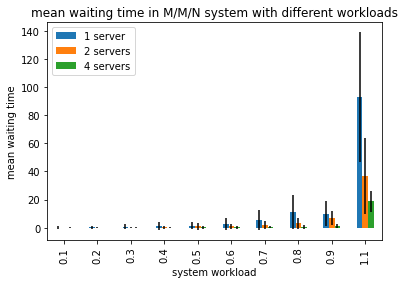

In [9]:
dfAllMar = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllMar.plot.bar(title = "mean waiting time in M/M/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [10]:
# assignment 2.3, use a different service strategy. Shortest job first(SJF).
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, helpStrat = "SJF", intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, helpStrat = "SJF", intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, helpStrat = "SJF", intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

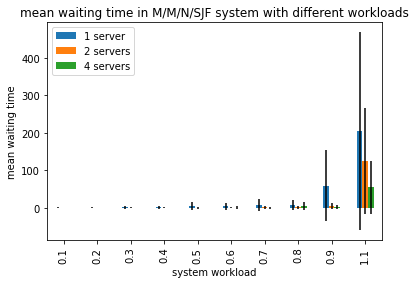

In [11]:
dfAllSJF = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllSJF.plot.bar(title = "mean waiting time in M/M/N/SJF system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [12]:
##2.4
# Deterministic sercive distribution
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "D")
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "D")
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "D")
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

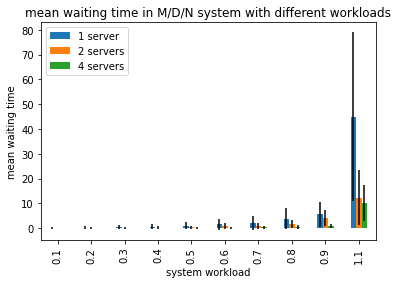

In [13]:
dfAllDet = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllDet.plot.bar(title = "mean waiting time in M/D/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [14]:
##2.4
# Deterministic sercive distribution
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "H")
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "H")
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time, serviceDistribution = "H")
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

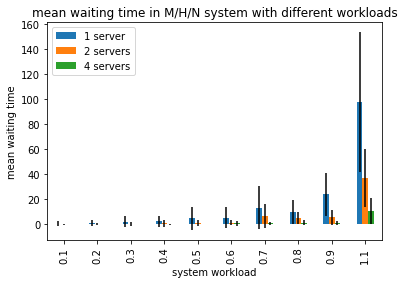

In [15]:
dfAllHyp = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllHyp.plot.bar(title = "mean waiting time in M/H/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)